C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


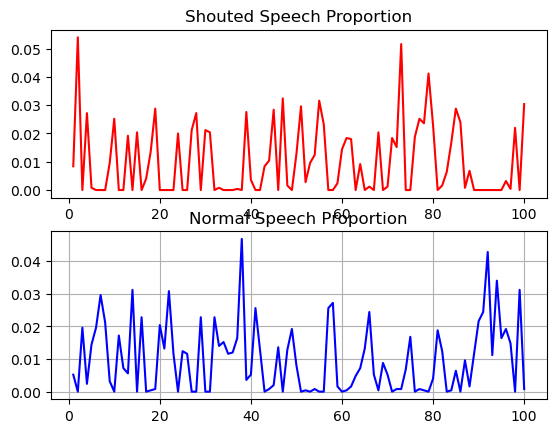

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Load the datasets
N = np.load("MFCC_N_2500.npy")
S = np.load("MFCC_S_2500.npy")

# 2. Append the arrays
D = np.append(N, S, axis=0)

# 3. Perform K-Means clustering
kmeans = KMeans(n_clusters=100, random_state=42)  # Set a random state for reproducibility
kmeans.fit(D)

# 4. Calculate proportions and create plots
PS = np.zeros(100)
PN = np.zeros(100)
for i in range(len(D)):
   cluster_index = kmeans.labels_[i]
   if i < 2500:  # Normal speech
       PN[cluster_index] += 1
   else:  # Shouted speech
       PS[cluster_index] += 1

PS /= 2500  # Normalize proportions
PN /= 2500

figure, axis = plt.subplots(2, 1)
axis[0].plot(range(1, 101), PS, color='red')
axis[0].set_title("Shouted Speech Proportion") 
axis[1].plot(range(1, 101), PN, color='blue')
axis[1].set_title("Normal Speech Proportion") 
#plt.xlabel('Cluster Index (j)')
#plt.ylabel('Proportion')
#plt.title('Proportions of Shouted and Normal Speech in K-Means Clusters')
#plt.legend()
plt.grid(True)
plt.show()

### Trying #3 using Kmeans with Euclidean distance

In [ ]:
k=100
epsilon=0.0003
mean = np.empty([k,D.shape[1]])
duplicate = []
for i in range(k):   # Initialisation of the Mean Vectors
    temp = np.random.randint(0,D.shape[0])
    if temp not in duplicate:
        mean[i,:] = D[temp,:]
        duplicate.append(temp)
    else:
        temp = np.random.randint(0,D.shape[0])
        mean[i,:] = D[temp,:]
        duplicate.append(temp)
error = 100.0
c = 1

In [ ]:
duplicate,mean

In [ ]:

while(error > epsilon):
        labels = []
        for i in range(D.shape[0]):
            norm = []
            for j in range(k):   # Computing the euclidian distance of every point with Mean Centers
                norm.append(np.linalg.norm((D[i,:]-mean[j,:]),2))
            norm = np.array(norm)
            index = np.argmin(norm)
            labels.append(index)

        new_mean = np.empty([k,D.shape[1]])
        for i in range(k):
            n = 0
            prev_mean = mean
            for j in range(D.shape[0]):
                if (i==labels[j]):
                    new_mean[i,:]=(new_mean[i,:]+D[j,:])
                    n+=1
            if n!=0:                        # Computing "new Mean"
                new_mean[i,:] = new_mean[i,:]/n
            else:
                new_mean[i,:] = prev_mean[i,:]
        error_temp = []
        for i in range(k):     # Checking for convergence
            error_temp.append(np.linalg.norm((new_mean[i,:]-mean[i,:]),2))
        error = max(error_temp)
        mean = new_mean
        break

In [ ]:
def kmeans2(D,k,epsilon,c_mean): # k is the number of clusters required
    mean = np.empty([k,D.shape[1]])
    duplicate = []
    for i in range(k):   # Initialisation of the Mean Vectors
        temp = np.random.randint(0,D.shape[0])
        if temp not in duplicate:
            mean[i,:] = D[temp,:]
            duplicate.append(temp)
        else:
            temp = np.random.randint(0,D.shape[0])
            mean[i,:] = D[temp,:]
            duplicate.append(temp)
    error = 100.0
    c = 1
    while(error > epsilon):
        labels = []
        for i in range(D.shape[0]):
            norm = []
            for j in range(k):   # Computing the euclidian distance of every point with Mean Centers
                norm.append(np.linalg.norm((D[i,:]-mean[j,:]),2))
                
            norm = np.array(norm)
            index = np.argmin(norm)
            labels.append(index)
        new_mean = np.empty([k,D.shape[1]])
        for i in range(k):
            n = 0
            prev_mean = mean
            for j in range(D.shape[0]):
                if (i==labels[j]):
                    new_mean[i,:]=(new_mean[i,:]+D[j,:])
                    n+=1
            if n!=0:                        # Computing "new Mean"
                new_mean[i,:] = new_mean[i,:]/n
            else:
                new_mean[i,:] = prev_mean[i,:]
        error_temp = []
        for i in range(k):     # Checking for convergence
            error_temp.append(np.linalg.norm((new_mean[i,:]-mean[i,:]),2))
        error = max(error_temp)
        mean = new_mean

        print("Iteration: ",c,mean)
        plt.figure()
        plt.scatter(D[:,0],D[:,1], c=labels,cmap='rainbow')
        plt.scatter(mean[:,0], mean[:,1], marker='x', c='y')
        plt.scatter(c_mean[:,0], c_mean[:,1], marker='^', c='r')
        plt.show()
        c +=1
    return mean

In [ ]:
# Calling our function
center= kmeans2(D,k,epsilon,mean)


In [ ]:
center